In [1]:
import json
import numpy as np
import pandas as pd

!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
ny_neighborhoods_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
ny_neighborhoods = pd.DataFrame(columns=column_names)

for data in ny_neighborhoods_data:
    borough=neighborhood_name=data['properties']['borough']
    neighborhood_name=data['properties']['name']
    
    neighborhood_latlon=data['geometry']['coordinates']
    neighborhood_lat=neighborhood_latlon[1]
    neighborhood_lon=neighborhood_latlon[0]
    
    ny_neighborhoods=ny_neighborhoods.append({'Borough':borough,
                                       'Neighborhood':neighborhood_name,
                                       'Latitude':neighborhood_lat,
                                       'Longitude':neighborhood_lon},ignore_index=True)

#Now the New York neighborhoods "ny_neighborhoods" has 306x4, columns are 'Borough','Neighborhood','Latitude','Longitude'

In [2]:
ny_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [3]:
!pip install lxml
import pandas as pd # library for data analsysis

In [4]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs = pd.read_html(url)[0]
#dfs is a dataframe object

df=dfs[dfs.Borough!="Not assigned"]
df=df.reset_index(drop=True)

for i in range(103):
    value=df.iloc[i]["Neighbourhood"]
    if value=="Not assigned":
        df.iloc[i]["Neighbourhood"]=df.iloc[i]["Borough"]
        print("find a NOT ASSIGNED")

#The above code is not actually used as there is no "Not assigned" value in column "Beighbourhood"

url="http://cocl.us/Geospatial_data"

import pandas
geo_df = pandas.read_csv(url)

tr_df=(df.join(geo_df.set_index('Postal Code'),on='Postal Code')).copy()
#learned from: manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tr_neighborhoods=tr_df.drop('Postal Code',axis=1)
tr_neighborhoods.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
#Change the column name from "Neighbourhood" to "Neighborhood" to have the same speling as New York data

#Now the Toronto neighborhoods "tr_neighborhoods" has 103x4, columns are 'Borough','Neighbourhood','Latitude','Longitude'

In [5]:
tr_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [6]:
tr_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [7]:
### I prefer using Code + "#" instead of "Markdown" for the comments. It is more neat and clear

### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
### Now we have
### ny_neighborhoods 306x4
###  tr_neighborhoods 103 x4
###  'Borough','Neighbourhood','Latitude','Longitude'
### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***

In [8]:
#! conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [9]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#The New York location info is retrived as Lat=0.7127281, Lon=-74.0060152

In [10]:
!pip install folium
import folium

     |████████████████████████████████| 94 kB 5.6 MB/s  eta 0:00:01


In [11]:
map_newyork=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, neighborhood in zip(ny_neighborhoods['Latitude'],ny_neighborhoods['Longitude'],ny_neighborhoods['Borough'],ny_neighborhoods['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

#Show the neighborhoods in New York Map

In [12]:
latitude=43.6532
longitude=-79.3832

map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, neighborhood in zip(tr_neighborhoods['Latitude'],tr_neighborhoods['Longitude'],tr_neighborhoods['Borough'],tr_neighborhoods['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
map_toronto

#Show the neighborhoods in Toronto Map

In [13]:
### I prefer using Code + "#" instead of "Markdown" for the comments. It is more neat and clear

### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
### Now we have checked
### neighborhoods in New York: 306 point
### neighborhoods in Toronto: 103 point
###  'Borough','Neighbourhood','Latitude','Longitude'
### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***

In [14]:
CLIENT_ID = '4BLKWPUP0EYC2U4UGAI3YQVWR5NDYHVDF1VNHK41DHG1EWVV'
CLIENT_SECRET = '4HYGXEIO145QTOAN4BOHOQNFWDWUSKF3HI3Q2EWZ4GHJIG3J'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN = 'XECU25SP52OQUWQJK2DPP42QKAZDRPTHDWOPZCKPJ1DQLGLK' 

# Query related access credentials

import requests

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

# Define a function
# Input: 
#    Neiborhood name arracy
#    Neiborhood latitude array
#    Neiborhood langitude array
# Output/return:
#    the list of nearby venues with columns of 
#       Neighborhood
#       Neighborhood Latitude
#       Neighborhood Longitude
#       Venue (the name of vanue)
#       Venue Latitude
#       Venue Longtitude
#       Venue Category

In [16]:
names=ny_neighborhoods['Neighborhood']
latitudes=ny_neighborhoods['Latitude']
longitudes=ny_neighborhoods['Longitude']
newyork_venues=getNearbyVenues(names, latitudes, longitudes, radius=500)

# manhatten_data -> ny_neighborhoods

# newyork_venues.shape now has 10091x7. The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [17]:
names=tr_neighborhoods['Neighborhood']
latitudes=tr_neighborhoods['Latitude']
longitudes=tr_neighborhoods['Longitude']
toronto_venues=getNearbyVenues(names, latitudes, longitudes, radius=500)

# toronto_venues.shape now has 2123x7. The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [18]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
...,...,...,...,...,...,...,...
2107,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,McDonald's,43.630007,-79.518041,Fast Food Restaurant
2108,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2109,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Once Upon A Child,43.631075,-79.518290,Kids Store
2110,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


In [19]:
from project_lib import Project

project = Project(project_id='50c3aaa3-b6f1-4296-9ebc-9af18ee896c8', project_access_token='p-c4dea1043afcc2bf1ff7062dc32071e3ff42975f')
pc = project.project_context
project.save_data(file_name = "newyork_venues.csv",data = newyork_venues.to_csv(index=False),overwrite=True)
project.save_data(file_name = "toronto_venues.csv",data = toronto_venues.to_csv(index=False),overwrite=True)
project.save_data(file_name = "toronto_neighborhoods_with_post_codes.csv",data = tr_df.to_csv(index=False),overwrite=True)

# save the New York Venues into a csv file in IBM stroage
# save the Toronto Venues into a csv file in IBM stroage
# save the Toronto Neighborhoods into a csv file in IBM stroage

# The reason why to introduce this step is because there are lot of queries during the prorgaming test. 
# The queries can be saved by calling out the data directly from this step by reading the csv file from IBM storage
# The project ID and Token are used to access the storage
# #####
# ####
# ###
# ##
# #
#

{'file_name': 'toronto_neighborhoods_with_post_codes.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',
 'asset_id': '1f929617-8429-4c65-99b2-fcb1efb4bcc7'}

In [20]:
#
# #
# ##
# ###
# ####
# #####

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d336738e189a4a92a957fc2b7a47a38f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Cx8S9QzCxCBtWX7Xok_4xNjUJq3yfq3Mq7zNEM4PlCA8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='newyork_venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

newyork_venues = pd.read_csv(body)

# Now the “newyork_venues” has the venue info 10082x7 The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

In [21]:
# Check some details of the records if needed
# newyork_venues.head()
# newyork_venues.shape

In [22]:
body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='toronto_venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_venues = pd.read_csv(body)

# Now the “toronto_venues” has the venue info 2123x7 The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

In [23]:
# Check some details of the records if needed
# toronto_venues.head()
# toronto_venues.shape

In [24]:
print("New York")
print(newyork_venues.head())
print(newyork_venues.shape)
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

print("Toronto")
print(toronto_venues.head())
print(toronto_venues.shape)
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

New York
  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
4           Dunkin'       40.890459       -73.849089      Donut Shop  
(10045, 7)
There are 440 uniques categories.
Toronto
       Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259         

In [25]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 440 uniques categories.


In [26]:
### List of the top venue categories of ***New York***neighborhoods
### (1) 

# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

# Grouped into neighborhoods
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()

# Now newyork_ground is 302x436 (number of neighborhoods x number of venue categories)

In [25]:
### List of the top venue categories of ***New York***neighborhoods
### (2) have a check of the top 5 venues frequncies (value 0~1)

num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.12
1       Deli / Bodega  0.08
2         Supermarket  0.08
3  Chinese Restaurant  0.08
4    Department Store  0.04


----Annadale----
           venue  freq
0   Liquor Store  0.11
1          Diner  0.11
2  Train Station  0.11
3           Park  0.11
4    Pizza Place  0.11


----Arden Heights----
          venue  freq
0      Pharmacy  0.25
1   Coffee Shop  0.25
2      Bus Stop  0.25
3   Pizza Place  0.25
4  Outlet Store  0.00


----Arlington----
                 venue  freq
0        Boat or Ferry   0.2
1        Deli / Bodega   0.2
2  American Restaurant   0.2
3         Home Service   0.2
4         Intersection   0.2


----Arrochar----
                venue  freq
0            Bus Stop  0.14
1  Italian Restaurant  0.09
2         Pizza Place  0.09
3       Deli / Bodega  0.09
4        Liquor Store  0.05


----Arverne----
           venue  freq
0      Surf Spot  0.21
1  Metro Station  0.11
2     Playground  0.05
3    Coffee

                venue  freq
0         Pizza Place  0.14
1  Italian Restaurant  0.10
2          Bagel Shop  0.10
3       Deli / Bodega  0.05
4      Ice Cream Shop  0.05


----Douglaston----
            venue  freq
0   Deli / Bodega  0.09
1     Pizza Place  0.09
2          Bakery  0.09
3            Bank  0.09
4  Ice Cream Shop  0.04


----Downtown----
                venue  freq
0         Coffee Shop  0.05
1        Burger Joint  0.05
2         Pizza Place  0.04
3  Chinese Restaurant  0.04
4                 Bar  0.03


----Dumbo----
                venue  freq
0                Park  0.07
1      Scenic Lookout  0.05
2              Bakery  0.05
3         Yoga Studio  0.03
4  Italian Restaurant  0.03


----Dyker Heights----
          venue  freq
0  Burger Joint   0.2
1    Bagel Shop   0.2
2   Golf Course   0.2
3          Food   0.2
4    Playground   0.2


----East Elmhurst----
                 venue  freq
0           Donut Shop  0.17
1  Rental Car Location  0.08
2          Supermarket  0.08


                venue  freq
0  Chinese Restaurant  0.09
1                 Bar  0.04
2                Bank  0.04
3         Pizza Place  0.04
4      Cosmetics Shop  0.04


----Kew Gardens Hills----
           venue  freq
0           Bank  0.17
1     Playground  0.11
2    Pizza Place  0.11
3     Restaurant  0.06
4  Deli / Bodega  0.06


----Kingsbridge----
                venue  freq
0         Pizza Place  0.07
1                 Bar  0.06
2       Deli / Bodega  0.06
3  Mexican Restaurant  0.04
4      Sandwich Place  0.04


----Kingsbridge Heights----
                   venue  freq
0            Pizza Place  0.18
1            Coffee Shop  0.09
2            Bus Station  0.06
3  Check Cashing Service  0.06
4     Mexican Restaurant  0.06


----Laurelton----
                  venue  freq
0  Caribbean Restaurant  0.43
1         Train Station  0.14
2      Sculpture Garden  0.14
3        Cosmetics Shop  0.14
4                  Park  0.14


----Lefrak City----
                venue  freq
0      Cos

                  venue  freq
0                  Café  0.09
1  Caribbean Restaurant  0.06
2                Bakery  0.06
3         Deli / Bodega  0.06
4           Pizza Place  0.06


----Prospect Park South----
                  venue  freq
0  Caribbean Restaurant  0.09
1  Fast Food Restaurant  0.07
2         Grocery Store  0.07
3           Pizza Place  0.07
4    Mexican Restaurant  0.07


----Queens Village----
              venue  freq
0              Bank  0.11
1    Discount Store  0.11
2          Bus Stop  0.11
3            Bakery  0.05
4  Department Store  0.05


----Queensboro Hill----
                venue  freq
0  Chinese Restaurant  0.13
1                Bank  0.09
2              Bakery  0.09
3         Supermarket  0.04
4    Asian Restaurant  0.04


----Queensbridge----
            venue  freq
0           Hotel  0.13
1        Platform  0.07
2            Park  0.07
3       Hotel Bar  0.07
4  Sandwich Place  0.07


----Randall Manor----
          venue  freq
0          Park  0.50


             venue  freq
0    Deli / Bodega  0.25
1  Bubble Tea Shop  0.25
2     Dance Studio  0.25
3      Candy Store  0.25
4     Outlet Store  0.00


----Williamsbridge----
                  venue  freq
0  Caribbean Restaurant  0.33
1             Nightclub  0.17
2                   Bar  0.17
3            Soup Place  0.17
4            Playground  0.17


----Williamsburg----
                       venue  freq
0                Coffee Shop  0.06
1                 Bagel Shop  0.06
2                Pizza Place  0.06
3  Middle Eastern Restaurant  0.03
4                Event Space  0.03


----Willowbrook----
          venue  freq
0      Bus Stop  0.43
1           Spa  0.14
2    Bagel Shop  0.14
3  Intersection  0.14
4   Pizza Place  0.14


----Windsor Terrace----
                    venue  freq
0           Deli / Bodega  0.10
1           Grocery Store  0.07
2                    Park  0.07
3                   Plaza  0.07
4  Thrift / Vintage Store  0.03


----Wingate----
                 venue

In [28]:
# Define a function to return the most frequent venues
# Input: list of venure frequency of a specific neighborhood, numer of top venues you want to check
# Output: The top venue categories of the specific neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
### List of the top venue categories of ***New York***neighborhoods
### (3) have each neighborhood a list of top vanue categories

import numpy as np

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
newyork_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
newyork_neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']
for ind in np.arange(newyork_grouped.shape[0]):
    newyork_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)
newyork_neighborhoods_venues_sorted.head()

# newyork_neighborhoods_venues_sorted has 302 x11 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Bus Station,Supermarket,Chinese Restaurant,Deli / Bodega,Playground,Gas Station,Breakfast Spot,Fast Food Restaurant,Grocery Store
1,Annadale,Pizza Place,Pharmacy,Train Station,Liquor Store,Food,Diner,Restaurant,Dance Studio,Factory,Falafel Restaurant
2,Arden Heights,Pizza Place,Deli / Bodega,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Exhibit,Eye Doctor,Factory,Falafel Restaurant
3,Arlington,Boat or Ferry,Deli / Bodega,Intersection,American Restaurant,Coffee Shop,Bus Stop,Fast Food Restaurant,Fish Market,Fish & Chips Shop,Filipino Restaurant
4,Arrochar,Bus Stop,Deli / Bodega,Pizza Place,Italian Restaurant,Liquor Store,Mediterranean Restaurant,Outdoors & Recreation,Sandwich Place,Middle Eastern Restaurant,Bagel Shop


In [30]:
### List of the top venue categories of ***Toronto*** neighborhoods
### (1) 

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# Grouped into neighborhoods
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

# Now toronto_ground is 96x436 (number of neighborhoods x number of venue categories)

In [29]:
### List of the top venue categories of ***Toronto***neighborhoods
### (2) have a check of the top 5 venues frequncies (value 0~1)

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store   0.2
1                     Lounge   0.2
2             Breakfast Spot   0.2
3  Latin American Restaurant   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1     Coffee Shop  0.12
2    Skating Rink  0.12
3  Sandwich Place  0.12
4             Pub  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.09
1                       Bank  0.09
2                   Pharmacy  0.05
3  Middle Eastern Restaurant  0.05
4              Shopping Mall  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4               Museum  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.08
1              Co

                 venue  freq
0                 Café  0.07
1          Coffee Shop  0.06
2         Cocktail Bar  0.04
3  American Restaurant  0.04
4            Gastropub  0.04


----St. James Town, Cabbagetown----
         venue  freq
0         Café  0.07
1   Restaurant  0.07
2  Coffee Shop  0.07
3          Pub  0.04
4  Pizza Place  0.04


----Steeles West, L'Amoreaux West----
                  venue  freq
0           Pizza Place  0.08
1           Coffee Shop  0.08
2  Fast Food Restaurant  0.08
3     Electronics Store  0.08
4           Supermarket  0.08


----Stn A PO Boxes----
                venue  freq
0         Coffee Shop  0.11
1  Seafood Restaurant  0.04
2  Italian Restaurant  0.03
3            Beer Bar  0.03
4        Cocktail Bar  0.03


----Studio District----
                 venue  freq
0          Coffee Shop  0.08
1  American Restaurant  0.06
2              Brewery  0.06
3            Gastropub  0.06
4               Bakery  0.06


----Summerhill West, Rathnelly, South Hill, For

In [31]:
### List of the top venue categories of ***Toronto***neighborhoods
### (3) have each neighborhood a list of top vanue categories

import numpy as np

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']
for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
toronto_neighborhoods_venues_sorted.head()

# toronto_neighborhoods_venues_sorted has 96 x11

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Ethiopian Restaurant,Event Space,Escape Room,Electronics Store,Farmers Market,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Dance Studio,Gym,Coffee Shop,Pharmacy,Pub,Sandwich Place,Women's Store,Dog Run,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Grocery Store,Park,Supermarket,Shopping Mall,Sandwich Place,Bridal Shop,Restaurant,Pizza Place
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Diner
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Pub,Indian Restaurant,Butcher,Sushi Restaurant,Restaurant,Juice Bar,Pizza Place


In [31]:
# This part is doing
# CLutsering of the neighborhoods
# Ploting the venue clusters in the map
#######################################################
###                                                 ###
###   This is an important part of the analysis     ###
###                                                 ###   
######################################################

# newyork_neighborhoods_venues_sorted has 302 x11
# toronto_neighborhoods_venues_sorted has 96 x11

In [32]:
# If folium is not installed and imported, excute the following 2 lines
#!pip install folium
#import folium

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [33]:
# This line is used to remove the inserted column "Cluster Labels" during debug
### ### ###
# newyork_neighborhoods_venues_sorted=newyork_neighborhoods_venues_sorted.drop('Cluster Labels',1)

In [34]:
newyork_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Supermarket,Playground,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Martial Arts School,Pharmacy
1,Annadale,Pizza Place,Diner,Pharmacy,Liquor Store,Train Station,Restaurant,Park,Deli / Bodega,American Restaurant,Food Truck
2,Arden Heights,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,Arlington,Boat or Ferry,Deli / Bodega,American Restaurant,Intersection,Home Service,Flea Market,Factory,Falafel Restaurant,Farm,Farmers Market
4,Arrochar,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Liquor Store,Food Truck,Outdoors & Recreation,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant


In [33]:
# Cluster newyork and marked in map

kclusters = 5
newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)
kmeans.labels_[0:10] 

newyork_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
newyork_merged = ny_neighborhoods
newyork_merged = newyork_merged.join(newyork_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newyork_merged = newyork_merged.fillna(0)
newyork_merged['Cluster Labels']=newyork_merged['Cluster Labels'].astype(int)

# New York Latitude and Longitute
latitude=40.7127281
longitude=-74.0060152

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [34]:
newyork_neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Allerton,Pizza Place,Bus Station,Supermarket,Chinese Restaurant,Deli / Bodega,Playground,Gas Station,Breakfast Spot,Fast Food Restaurant,Grocery Store
1,2,Annadale,Pizza Place,Pharmacy,Train Station,Liquor Store,Food,Diner,Restaurant,Dance Studio,Factory,Falafel Restaurant
2,1,Arden Heights,Pizza Place,Deli / Bodega,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Exhibit,Eye Doctor,Factory,Falafel Restaurant
3,1,Arlington,Boat or Ferry,Deli / Bodega,Intersection,American Restaurant,Coffee Shop,Bus Stop,Fast Food Restaurant,Fish Market,Fish & Chips Shop,Filipino Restaurant
4,1,Arrochar,Bus Stop,Deli / Bodega,Pizza Place,Italian Restaurant,Liquor Store,Mediterranean Restaurant,Outdoors & Recreation,Sandwich Place,Middle Eastern Restaurant,Bagel Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2,Woodhaven,Deli / Bodega,Park,Bank,Pharmacy,Fried Chicken Joint,Hookah Bar,Thai Restaurant,Sandwich Place,Nail Salon,Mexican Restaurant
297,1,Woodlawn,Pub,Pizza Place,Deli / Bodega,Playground,Bar,Grocery Store,Park,Pharmacy,Liquor Store,Auto Workshop
298,2,Woodrow,Pharmacy,Chinese Restaurant,Bakery,Sushi Restaurant,Miscellaneous Shop,Donut Shop,Pizza Place,Gift Shop,Coffee Shop,Grocery Store
299,2,Woodside,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,Pub,Bar,Donut Shop,American Restaurant,Gourmet Shop


In [35]:
newyork_neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Pizza Place           34
Italian Restaurant    31
Deli / Bodega         21
Coffee Shop           15
Chinese Restaurant    14
                      ..
Pier                   1
Surf Spot              1
Spanish Restaurant     1
Harbor / Marina        1
Dessert Shop           1
Name: 1st Most Common Venue, Length: 80, dtype: int64

In [92]:
# This line is used to remove the inserted column "Cluster Labels" during debug
### ### ###
# toronto_neighborhoods_venues_sorted=toronto_neighborhoods_venues_sorted.drop('Cluster Labels',1)

In [36]:
# Cluster toronto and marked in map

kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10] 

toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = tr_neighborhoods
toronto_merged = toronto_merged.join(toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

# Toronto Latitude and Longitute
latitude=43.6532
longitude=-79.3832

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [37]:
toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

In [38]:
tr_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...
98,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [39]:
newyork_merged['Cluster Labels'].value_counts()

2    245
1     48
0     10
3      2
4      1
Name: Cluster Labels, dtype: int64

In [42]:
toronto_merged['Cluster Labels'].value_counts()

1    87
0    12
2     2
4     1
3     1
Name: Cluster Labels, dtype: int64

In [40]:
toronto_merged.shape

(103, 15)

In [42]:
df_cluster = newyork_merged[(newyork_merged['Cluster Labels'] ==2)]
df_cluster['1st Most Common Venue'].value_counts()

Pizza Place                  32
Italian Restaurant           25
Coffee Shop                  15
Chinese Restaurant           14
Pharmacy                     10
                             ..
Latin American Restaurant     1
Cosmetics Shop                1
Spanish Restaurant            1
Baseball Field                1
Other Repair Shop             1
Name: 1st Most Common Venue, Length: 67, dtype: int64

In [44]:
df_cluster = toronto_merged[(toronto_merged['Cluster Labels'] ==2)]
df_cluster['1st Most Common Venue'].value_counts()

Coffee Shop               18
Grocery Store              7
Café                       7
Park                       6
Clothing Store             3
Pizza Place                3
Trail                      3
Gym                        3
Fast Food Restaurant       2
Sandwich Place             2
Indian Restaurant          2
Furniture / Home Store     2
Rental Car Location        2
Bakery                     1
Thai Restaurant            1
Bus Line                   1
Breakfast Spot             1
Garden                     1
Restaurant                 1
Dessert Shop               1
Ramen Restaurant           1
Department Store           1
Sporting Goods Shop        1
Hakka Restaurant           1
Brewery                    1
Electronics Store          1
Butcher                    1
Lounge                     1
Gym / Fitness Center       1
Dim Sum Restaurant         1
Light Rail Station         1
Airport Service            1
Beer Store                 1
Greek Restaurant           1
Hockey Arena  

Text(0.5, 1.0, 'Top NewYork Venues')

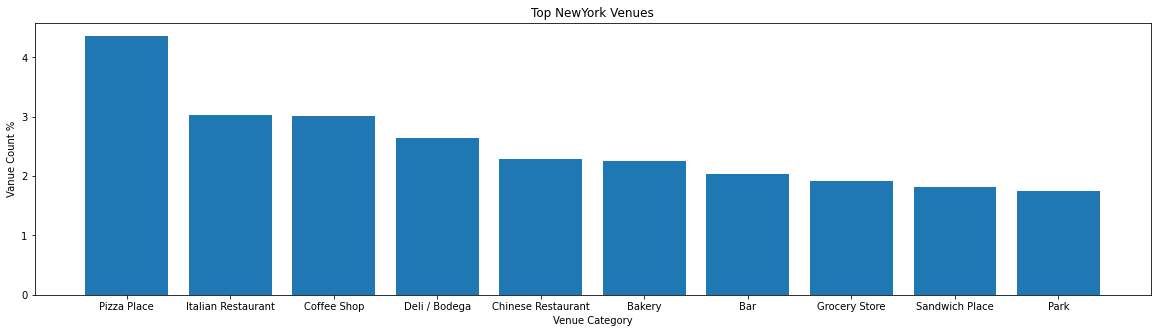

In [45]:
newyork_top=newyork_venues['Venue Category'].value_counts()[0:10]
#newyork_top

newyork_top_df=pd.DataFrame({'Venue Category':newyork_top.index, 'Vanue Count':newyork_top.values})
newyork_top_df['Vanue Count']=newyork_top_df['Vanue Count']/10091*100

#newyork_top_df

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=newyork_top_df['Venue Category']

fig=pyplot.gcf()
fig.set_size_inches(20,5)

pyplot.bar(group_names, newyork_top_df['Vanue Count'])

plt.pyplot.xlabel("Venue Category")
plt.pyplot.ylabel("Vanue Count %")
plt.pyplot.title("Top NewYork Venues")

Text(0.5, 1.0, 'Top Toronto Venues')

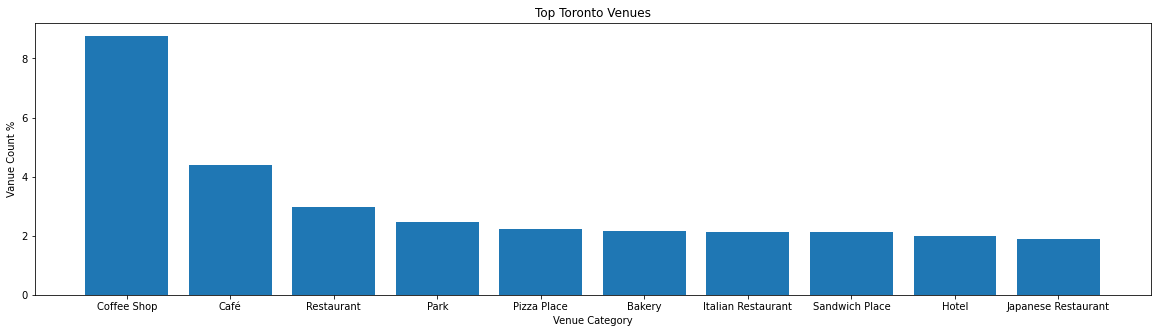

In [46]:
toronto_top=toronto_venues['Venue Category'].value_counts()[0:10]
#toronto_top

toronto_top_df=pd.DataFrame({'Venue Category':toronto_top.index, 'Vanue Count':toronto_top.values})
toronto_top_df['Vanue Count']=toronto_top_df['Vanue Count']/2123*100

#toronto_top_df

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=toronto_top_df['Venue Category']

fig=pyplot.gcf()
fig.set_size_inches(20,5)

pyplot.bar(group_names, toronto_top_df['Vanue Count'])

plt.pyplot.xlabel("Venue Category")
plt.pyplot.ylabel("Vanue Count %")
plt.pyplot.title("Top Toronto Venues")

In [ ]:
############################################################
#
# Analysis of dwelling type in Toronto neighborhoods
#
############################################################

In [47]:
#
# #
# ##
# ###
# ####
# #####

# The following can be independent from the above code as the data in previous step was saved and can be retrived from IBM storage 

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d336738e189a4a92a957fc2b7a47a38f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Cx8S9QzCxCBtWX7Xok_4xNjUJq3yfq3Mq7zNEM4PlCA8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='toronto_neighborhoods_with_post_codes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tr_df = pd.read_csv(body)

# Now the “tr_neighborhoods” has the venue info 103x4 The columns: Borough / Neighborhood / Latitude / Longitude

body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='Toronto_Statistic_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tr_statistic = pd.read_csv(body)

# Now the “tr_df” has the venue info 103x4 The columns: Postal Code / Borough / Neighborhood / Latitude / Longitude

In [48]:
body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='toronto_neighborhoods_with_post_codes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tr_df = pd.read_csv(body)
body

In [49]:
body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='Toronto_Statistic_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tr_statistic = pd.read_csv(body)
body

In [50]:
tr_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [51]:
tr_statistic

,Post Code,Average Rooms,Average Value
0,M1B,5.7,475936.0
1,M1C,7.6,718791.0
2,M1E,5.8,521644.0
3,M1G,5.2,555488.0
4,M1H,4.8,460806.0
...,...,...,...
97,M9N,4.8,557797.0
98,M9P,6.0,716217.0
99,M9R,5.5,582707.0
100,M9V,5.3,473261.0


In [52]:
tr_df=tr_df[~tr_df['Postal Code'].isin(['M7A'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M7R'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M7Y'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M5K'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M5L'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M5W'])]
tr_df=tr_df[~tr_df['Postal Code'].isin(['M5X'])]

tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M7A'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M7R'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M7Y'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M5K'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M5L'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M5W'])]
tr_statistic=tr_statistic[~tr_statistic['Post Code'].isin(['M5X'])]

# M7A, M7R, M7Y are the Post Codes reserved for Ontario Government, Post Canada Forwarding and Processing Center, there is no residence, need to be removed
# M5K, M5L, M5W, M5X are the Post Codes reserved for "Toronto Dominion Centre, Design Exchange", "Commerce Court, Victoria Hotel", "Stn A PO Boxes", "First Canadian Place, Underground city". There is no residence, need to be removed


tr_data=(tr_df.join(tr_statistic.set_index('Post Code'),on='Postal Code')).copy()
tr_data = tr_data.reset_index(drop=True)

# After this, tr_df and tr_statistic have exactly 96 lines.
# Now merge tr_df and tr_statistic into tr_data which has columns "Postal Code", "Borough", "Neighbourhood", "Latitude", "Longitude", "Average Rooms", "Average Value"

tr_data["Average Value"] = tr_data["Average Value"].astype("float")
# Convert the string values to float
tr_data.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
# Standardize the spelling and column name "Neighborhood"

In [53]:
tr_data['Average Value'].describe()

count    9.600000e+01
mean     8.069142e+05
std      3.701061e+05
min      3.245700e+05
25%      5.597500e+05
50%      7.121075e+05
75%      8.859228e+05
max      2.090328e+06
Name: Average Value, dtype: float64

In [54]:
tr_data['Average Rooms'].describe()

count    96.000000
mean      5.167708
std       1.001525
min       3.100000
25%       4.700000
50%       5.300000
75%       5.700000
max       7.800000
Name: Average Rooms, dtype: float64

In [55]:
tr_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Average Rooms,Average Value
0,M3A,North York,Parkwoods,43.753259,-79.329656,5.3,786733.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.7,560401.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3.5,573259.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.6,644259.0
4,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,5.6,1089850.0
...,...,...,...,...,...,...,...
91,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,3.4,873003.0
92,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,6.4,1192475.0
93,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,3.2,501891.0
94,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,5.0,767225.0


In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [57]:
new_df=tr_data[['Average Value']]
new_df=new_df.reset_index()
new_df.head()

,index,Average Value
0,0,786733.0
1,1,560401.0
2,2,573259.0
3,3,644259.0
4,4,1089850.0


Text(0.5, 1.0, 'Average Dwelling Value Distribution (in $m)')

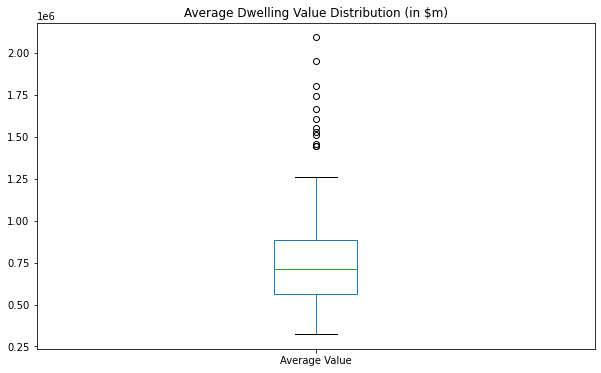

In [58]:
new_df['Average Value'].plot(kind='box',figsize=(10,6))
plt.title('Average Dwelling Value Distribution (in $m)')

In [59]:
new_df=tr_data[['Average Rooms']]
new_df=new_df.reset_index()
new_df.head()

,index,Average Rooms
0,0,5.3
1,1,4.7
2,2,3.5
3,3,4.6
4,4,5.6


Text(0.5, 1.0, 'Average Number of Dwelling Rooms Distribution')

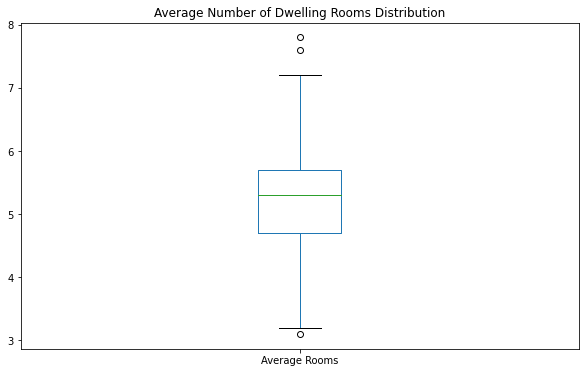

In [60]:
new_df['Average Rooms'].plot(kind='box',figsize=(10,6))
plt.title('Average Number of Dwelling Rooms Distribution')

In [61]:
# If not installed and imported yet, please do itlatitude=43.6532
longitude=-79.3832

map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, Value in zip(tr_data['Latitude'],tr_data['Longitude'],tr_data['Borough'],tr_data['Average Value']):
    label='{}\n----------\n${}'.format(neighborhood,Value)
    label=folium.Popup(label,parse_html=True)
    
    if(Value<400000):
        dynamic_color='red'
    if(Value>=400000 and Value<600000):
        dynamic_color='yellow'
    if(Value>=600000 and Value<1200000):
        dynamic_color='green'
    if(Value>=1200000):
        dynamic_color='blue'

    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color=dynamic_color,
        fill=True,
        fill_color='',
        ##3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

#Show the neighborhoods in Toronto Map
!pip install folium
import folium

In [45]:
latitude=43.6532
longitude=-79.3832

map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, Value in zip(tr_data['Latitude'],tr_data['Longitude'],tr_data['Borough'],tr_data['Average Value']):
    label='{}\n----------\n${}'.format(neighborhood,Value)
    label=folium.Popup(label,parse_html=True)
    
    if(Value<400000):
        dynamic_color='red'
    if(Value>=400000 and Value<600000):
        dynamic_color='yellow'
    if(Value>=600000 and Value<1200000):
        dynamic_color='green'
    if(Value>=1200000):
        dynamic_color='blue'

    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color=dynamic_color,
        fill=True,
        fill_color='',
        ##3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

#Show the neighborhoods in Toronto Map

In [62]:
latitude=43.6532
longitude=-79.3832

map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, Rooms in zip(tr_data['Latitude'],tr_data['Longitude'],tr_data['Borough'],tr_data['Average Rooms']):
    label='{}\n----------\n{}'.format(neighborhood,Rooms)
    label=folium.Popup(label,parse_html=True)
    
    if(Rooms<3.5):
        dynamic_color='red'
    if(Rooms>=3.5 and Rooms<5.5):
        dynamic_color='yellow'
    if(Rooms>=5.5 and Rooms<7):
        dynamic_color='green'
    if(Rooms>=7):
        dynamic_color='blue'

    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color=dynamic_color,
        fill=True,
        fill_color='',
        ##3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

#Show the neighborhoods in Toronto Map